# Exam Results: Simple Linear Regression
## Intro
**Supervised learning** is a process in which the algorithm is provided with both the **features** (independent variables) and **labels** (dependent variable) so that it can learn the relationship between inputs and outputs and use these to predict and quantify the relationships between them.

The two main types of supervised learning are **regression and classification**, the former identifying relationships between **continous data** whilst the latter assesses **discrete, categorical data**. Univariate (or simple) linear regression is the simplest form of regression, looking at the linear relationship between a single feature and a single label. Here, we will analyse the relationship between amount of hours studied for an exam and the result achieved (link to data and project below):

Project Link: https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

## Linear Relationships
First, let's plot the data to demonstrate it's linearity. It is only because we have identified the linear relationship between these variables through observation of this plot that we know to use a linear model in this instance.

Text(0.5, 1.0, 'Hours Studied vs. Exam Score')

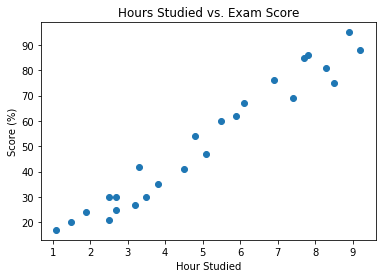

In [41]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# show plots in notebook
%matplotlib inline

# load data
exam_df = pd.read_csv('student_scores.csv')

# plot data
plt.scatter(exam_df['Hours'], exam_df['Scores'])
plt.xlabel('Hour Studied')
plt.ylabel('Score (%)')
plt.title('Hours Studied vs. Exam Score')

The first thing to notice is the linearity of the data, as one set of values increases, so does the other in a linear manner. A straight line has the equation **y = mx + c** where y and x are simply the two variables values, **m is the gradient** of the line and **c is the y-intercept**. Therefore, when trying to determine a line of best fit to describe our data, the only things we can vary are the gradient and the y-intercept.

Linear regression algorithms aim to determine the **line of best fit** by varying these two parameters in order to create a line which **minimises the error** between the line values and the corresponding data values (X, y).

We will come onto **multiple linear regression** later, but the process is broadly the same except this time the dependent variable (y) is dependent on more than one independent variable. If we draw a **line** to fit two-dimensional data (i.e. 1 feature, 1 label) then we must draw a **plane** for three-dimensional data and a **hyper-plane** for more than three-dimensional data.

## Linear Regression
We will now run a simple linear regression on the above data, this dataset is incredibly small and simplistic (25 rows, 2 columns, no nulls etc.) therefore we don't need to do any investigation or cleaning initially.

Instead, we will complete the following steps:
* Extract our features (X) and labels (y)
* Split data into train and test subsets
* Fit a model to our training data
* Apply the model to our test data and compare the predicted values to the actual values
* Tune the model if necessary
* Use the finalised model to make predictions on new data

**Note:** really quick tutorial for running linear regression and plotting outcomes - https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d

y-intercept: -1.5369573315500702
Gradient: [10.46110829]


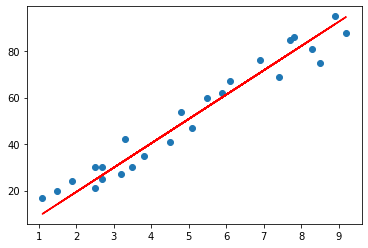

In [69]:
# extract features and labels (NOTE: X must be 1D numpy array)
X = exam_df.iloc[:, :-1].values
y = exam_df.iloc[:, 1].values

# load libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# split train and test data (80% train, 20% test, random_state to ensure consistent results each time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# instantiate linear regression model
regr = LinearRegression()

# fit model to training data
regr.fit(X_train, y_train)

# print y-intercept and gradient of fitted line
print('y-intercept: ' + str(regr.intercept_) + '\n' + 'Gradient: ' + str(regr.coef_))

# make y predictions using existing X values
y_pred = regr.predict(X)

# plot regression line/fitted model over our input data
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')

The gradient from the above fitted line gives an indication of the effect of changing hours studied (independent variable) on exam score (dependent variable). For example, if the value was 10, that would mean that when you increase the hours studied by 1, the exam score would on average increase by 10%.

As you can see from the above plot, our model line looks like a fairly good predictor of hours studied vs. exam scores, running almost exactly through the middle of our data points. This means that when we use our model to predict y-values based on our X inputs and the equation we've determined to produce the minimised error scores, we create our red regression line which we can compare to our actual data.

## Making Predictions

Now that we have built our model, we can use it to predict specific exam scores based on new examples of hours studied.

In [72]:
# predict y values from test data
y_pred = regr.predict(X_test)

# combine into df and compare actual vs. predicted values
data = zip(y_test, y_pred)
comp = pd.DataFrame(data=data, columns=['Actual', 'Predicted'])
comp

,Actual,Predicted
0,17,9.970262
1,42,32.984700
2,24,18.339148
3,75,87.382463
4,54,48.676362


As you can see, the predictions are OK but not perfect. It's worth bearing in mind that our dataset is tiny (25 samples), meaning that the training set is just 20 samples whils the test set is just 5 samples, this isn't much to go off and means our model can only be so accurate.

## Model Accuracy
It's all good and well building a model, but to ensure that it is a good predictor of real world data we need to understand how accurate it is at predicting outcomes in our current dataset and also get a feel for whether or not we've over or under-trained the model to our sample data.

There are different ways of calculating the accuracy of our model, for linear regression there are 3 main methods:
* **MAE:** mean absolute error (sum of actual vs. predicted variance)
* **MSE:** mean squared error (same as above but squared)
* **RMSE:** root mean squared error (same as above but square rooted)

Each has it's own pros and cons (details at link below), but for now SKLearn has all of these in-built so we can run them all and assess the results.

**Which error measurement to use:** https://www.dataquest.io/blog/understanding-regression-error-metrics/

In [77]:
# load libraries
from sklearn import metrics

# calculate errors, means and proportions
mae = round(metrics.mean_absolute_error(y_test, y_pred),2)
mse = round(metrics.mean_squared_error(y_test, y_pred),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2)
mean_scores = round(exam_df['Scores'].mean(),2)
prop = round(rmse/mean_scores, 2)

# run all 3 error measurements
print('Mean Absolute Error: ', mae)
print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)

# show mean of all test scores
print('Mean of Test Scores: ', mean_scores)

# show proportion of RMSE of test scores mean
print('Proportion RMSE of Mean Test Scores: ', prop)

Mean Absolute Error:  7.88
Mean Squared Error:  68.88
Root Mean Squared Error:  8.3
Mean of Test Scores:  51.48
Proportion RMSE of Mean Test Scores:  0.16


RMSE (and the other error scores) aren't useful by themselves, they will vary drastically depending on what your data is and what variables you're looking at. As a general rule, if you look at the proportion of RMSE out of your mean test scores, this can tell you how good your model is. Ideally you'd want your **RMSE to be less than 10% of your independent variable's mean**, so our model is OK but not great in this instance.

## To Do
* How to determine if your model is over/under-fitted.
* How to adjust your model if it is either over/under-fitted.
* Useful resources for over/under-fitting:
    * https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html
    * https://stackoverflow.com/questions/43045426/linear-regression-overfitting
* Use k-folds cross-validation to see if other models or parameter combinations are more effective on this dataset.
* Useful resources for k-folds cross-validation:
    * https://scikit-learn.org/stable/modules/cross_validation.html
* Read up on train/test split and see if there are ways to run multiple different train/test combinations or if I need to validate/assess the method, randomness etc. of the split process.